In [1]:
#loading all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the train and test dataset
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
train_raw = train.copy()
test_raw = test.copy()
print("Train : {}".format(train.shape))
print("Test : {}".format(test.shape))

Train : (1460, 81)
Test : (1459, 80)


In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#some useful information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

There are 38 columns with numeric data and 43 columns with categorical data in the train dataset.

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

There are 37 columns(*not having SalePrice column*) with numeric data and 43 columns with categorical data in the test dataset.

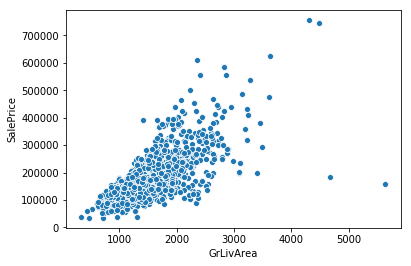

In [7]:
#outliers in grlivarea (indicated in dataset documentation)
sns.scatterplot(x = train.GrLivArea,y = train.SalePrice)

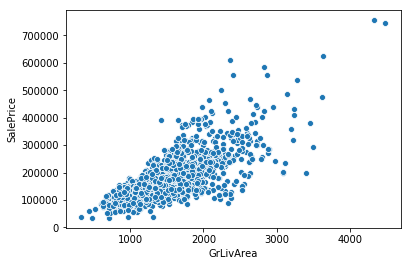

In [8]:
#taking out outliers
train.drop(index = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index,
           inplace = True)
sns.scatterplot(x = train.GrLivArea,y = train.SalePrice)

# Analysing target variable : SalePrice

In [9]:
train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness : 1.881296


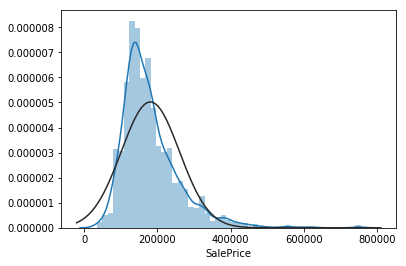

In [10]:
#histogram plot
from scipy.stats import norm
sns.distplot(train.SalePrice,fit = norm)
print('Skewness : %f' %train.SalePrice.skew())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness : 0.121580


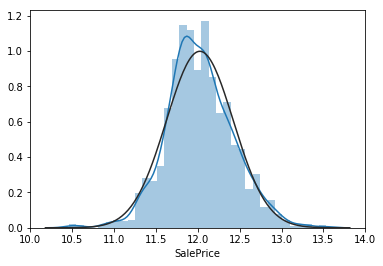

In [11]:
#log transforming saleprice
train['SalePrice'] = np.log1p(train.SalePrice)
sns.distplot(train.SalePrice,fit = norm)
print('Skewness : %f' %train.SalePrice.skew())

# Handling missing values

In [12]:
#missing values in training set
train.isnull().sum().sort_values(ascending = False)[:20]

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [13]:
#missing values in test set
test.isnull().sum().sort_values(ascending = False)[:35]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
LandSlope          0
dtype: int64

In [14]:
n_train = train.shape[0]
n_test = test.shape[0]
y_train = train.SalePrice.values
train.drop(columns = 'SalePrice',inplace = True)
all_data = pd.concat((train,test)).reset_index(drop = True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


**MSZoning** - filling the missing values with mode 'RL'

In [15]:
all_data.MSZoning.fillna(all_data.MSZoning.mode()[0],inplace = True)
#all_data.MSZoning.isnull().sum()

**LotFrontage** - filling missing values with median LotFrontage of Neighborhood

In [16]:
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x : 
                                                                                   x.fillna(x.median()))

**Alley** - NA in Alley means No alley access.Hence filling missing values with 'None'

In [17]:
all_data.Alley.fillna('None',inplace = True)

**PoolQC** - NA means no pool. Hence filling missing values with 'None'

In [18]:
all_data.PoolQC.fillna('None',inplace = True)

**MiscFeature** - NA means "no misc feature" .Hence filling missing values with 'None'

In [19]:
all_data.MiscFeature.fillna('None',inplace = True)

**Fence** - NA means "no fence"

In [20]:
all_data.Fence.fillna('None',inplace = True)

**FireplaceQu** - NA means "no fireplace"

In [21]:
all_data.FireplaceQu.fillna('None',inplace = True)

**Garage Variables** - GarageType, GarageFinish, GarageQual, GarageCond, GarageYrBlt, GarageArea and GarageCars

NA in Garage Variables means no Garage.Hence imputing the numerical features with '0' and imputing the categorical features with 'None'. 

In [22]:
for feature in ('GarageType','GarageFinish','GarageQual','GarageCond') :
    all_data[feature].fillna('None',inplace = True)
for feature in ('GarageYrBlt','GarageArea','GarageCars') :
    all_data[feature].fillna(0,inplace = True)    

**Basement Variables**

* *BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath* : In these numerical features NA most likely means no basement. Hence we can safely fill the missing values with zero.

* *BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2* : In these categorical features NA means no basement.Hence imputing the missing values with 'None'. 

In [23]:
for feature in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[feature].fillna(0,inplace = True)
for feature in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[feature].fillna('None',inplace = True)

**MasVnrArea and MasVnrType** - NA most likely means no masonry veneer for these houses.

In [24]:
all_data["MasVnrType"].fillna("None",inplace = True)
all_data["MasVnrArea"].fillna(0,inplace = True)

**Electrical** - Filling NA with mode.

In [25]:
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0],inplace = True)

**Utilities** -  Filling NA with mode.

In [26]:
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0],inplace = True)

**Functional** - According to data description NA means Typical

In [27]:
all_data['Functional'].fillna('Typ',inplace = True)

**KitchenQual** - Filling NA with mode

In [28]:
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace = True)

**Exterior1st and Exterior2nd** - Filling NA with mode

In [29]:
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace = True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace = True)

**SaleType** - Filling NA with mode

In [30]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace = True)

# **Feature Engineering**

In [31]:
#some numerical features are actually categorical
for feature in ('MSSubClass','MoSold') :
    all_data[feature] = all_data[feature].astype(str)

In [32]:
#mapping the quality variables to numerical
#lower quality to higher quality mapped to lower number to higher number
qual_dict = {'None': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5 }
for feat in ('ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
            'GarageQual','GarageCond','PoolQC') :
    all_data[feat] = all_data[feat].map(qual_dict).astype(int)
    
#further mapping
all_data["BsmtExposure"] = all_data["BsmtExposure"].map(
    {"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)
all_data["Street"] = all_data["Street"].map({'None': 0 , 'Grvl': 1 , 'Pave': 2}).astype(int)
all_data["Alley"] = all_data["Alley"].map({'None': 0 , 'Grvl': 1 , 'Pave': 2}).astype(int)

bsmtfin_dict = {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].map(bsmtfin_dict).astype(int)
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].map(bsmtfin_dict).astype(int)

all_data["CentralAir"] = all_data["CentralAir"].map({"N": 0 , "Y": 1})
all_data["Functional"] = all_data["Functional"].map({"Sal": 1, "Sev": 1, "Maj2": 2, "Maj1": 2, 
         "Mod": 3, "Min2": 3, "Min1": 3, "Typ": 4}).astype(int)
all_data["GarageFinish"] = all_data["GarageFinish"].map(
    {"None": 0, "Unf": 1, "RFn": 2,"Fin": 3}).astype(int)
all_data["Fence"] = all_data["Fence"].map(
        {"None": 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

In [33]:
#Extracting Features
#LotShape - Distinguishing just between regular and irregular as IR3 and IR2 appears rarely
all_data['IsRegularLotShape'] = (all_data['LotShape'] == 'Reg') * 1
#LandContour - Most properties are level
all_data['IsLandLevel'] = (all_data['LandContour'] == 'Lvl') * 1
#LandSlope - most land slopes are gentle
all_data['IsGentleSlope'] = (all_data['LandSlope'] == 'Gtl') * 1
#Electrical - Most properties have standard circuit breakers
all_data['IsElectricalSBrkr'] = (all_data['Electrical'] == 'SBrkr') * 1
#GarageType - Almost all the properties have attached garage
all_data['IsGargageDetached'] = (all_data['GarageType'] == 'Detchd') * 1
#MiscFeature - Presence or absence
all_data['HasMiscFeature'] = (all_data['MiscFeature'] != 'None') * 1
#PavedDrive - Ispaved drive or not
all_data['IsPavedDrive'] = (all_data['PavedDrive'] == 'Y') * 1
#House not completed
all_data['HouseNotCompleted'] = (all_data['SaleCondition'] == 'Partial') * 1

# complete information is extracted from these two , so dropping these features
dropcols = ['MiscFeature','PavedDrive']
all_data.drop(dropcols,axis = 1,inplace = True)

In [34]:
#Creating new features
#whether the house was remodelled once
all_data['Remodelled'] = (all_data['YearBuilt'] != all_data['YearRemodAdd']) * 1
#whether it is a new house
all_data['NewHouse'] = (all_data['YearBuilt'] == all_data['YrSold']) * 1
#whether remodelled recently
all_data['RecentRemodel'] = (all_data['YearRemodAdd'] == all_data['YrSold']) * 1
#Total sqft for house
all_data['AllSF'] = all_data['GrLivArea'] + all_data['TotalBsmtSF']
#Total full bathrooms
all_data['TotalFullBath'] = all_data['FullBath'] + all_data['BsmtFullBath']
#Total half bathrooms
all_data['TotalHalfBath'] = all_data['HalfBath'] + all_data['BsmtHalfBath']
#All floors sqft
all_data['AllFlrSF'] = all_data['1stFlrSF'] + all_data['2ndFlrSF']



'YearBuilt' ,'YearRemodAdd','GarageYrBlt','YrSold'

In [35]:
#Handling year variables
for feat in ('YearBuilt','YearRemodAdd','GarageYrBlt','YrSold') :
    all_data[feat] = pd.qcut(all_data[feat],q = 10,duplicates = 'drop')

In [36]:
#splitting up into train and test sets
train = all_data[:n_train]
test = all_data[n_train:]

In [37]:
#applying log transformation for highly skewed features
from scipy.stats import skew
numeric_features = train.select_dtypes(exclude = [object,'category']).drop(columns = ['Id']).columns
skewness = train[numeric_features].apply(lambda x : skew(x.dropna()))
skewed_features = skewness[abs(skewness) > 0.75].index
train[skewed_features] = np.log1p(train[skewed_features])
test[skewed_features] = np.log1p(test[skewed_features])

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [38]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [39]:
print(train.shape)
print(test.shape)

(1458, 290)
(1459, 277)


There exists some features which are only in training set and not in test set.Removing those features so as not to overfit on the training set.

In [40]:
common_features = train.columns & test.columns
train = train[common_features]
test = test[common_features]

# **Modelling**

In [41]:
#defining our error metric
from sklearn.model_selection import KFold,cross_val_score
def rmse(model) :
    kf = KFold(n_splits = 5,shuffle = True,random_state = 6)
    rmse = np.sqrt(-1 * cross_val_score(model,X = train,y = y_train,
                                        scoring = "neg_mean_squared_error",cv = kf))
    return rmse
    

# Linear Regression

In [42]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
print("Linear Regression score : {:.4f}".format(rmse(lr).mean()))
lr.fit(train,y_train)
pred_lr = np.exp(lr.predict(test))
submission_lr = pd.DataFrame({"Id" : test_raw["Id"], "SalePrice" : pred_lr })
submission_lr.to_csv("linear_regression",index = False)

Linear Regression score : 0.1206


The above submission scored 0.13847 on public LB.

# Ridge Regression

In [43]:
#Let's do cross validation to find the best alpha
# from sklearn.linear_model import Ridge, RidgeCV
# kfold = KFold(n_splits = 5,shuffle = True,random_state = 6)
# ridgecv = RidgeCV(alphas = [0.01,0.03,0.06,0.1,0.3,0.6,1,3,6,10,30,60],
#                   scoring = 'neg_mean_squared_error',cv = kfold)
# ridgecv.fit(train,y_train)
# print("Best alpha {}".format(ridgecv.alpha_))
# #further cross validation with alphas centred around best alpha
# alphas = [coeff * ridgecv.alpha_ for coeff in np.arange(0.6,1.4,0.05)]
# ridgecv = RidgeCV(alphas = alphas,scoring = 'neg_mean_squared_error',cv = kfold)
# ridgecv.fit(train,y_train)
# print("Best alpha after further cross validation {}".format(ridgecv.alpha_))

In [44]:
#fitting ridge regression
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge(alpha = 6.3) #found by cross validation
print("Ridge Regression score : {:.4f}".format(rmse(ridge).mean()))
ridge.fit(train,y_train)
pred_rr = np.exp(ridge.predict(test))
submission_rr = pd.DataFrame({"Id" : test_raw["Id"], "SalePrice" : pred_rr })
submission_rr.to_csv("ridge_regression",index = False)

Ridge Regression score : 0.1136


The above submission scored 0.12467 on public LB

# LASSO Regression 
**Least Absolute Shrinkage Selector Operator**

In [45]:
#cross validation to find optimum alpha for lasso regression
# from sklearn.linear_model import LassoCV,Lasso
# kfold = KFold(n_splits = 5,shuffle = True,random_state = 6)
# lassocv = LassoCV(alphas = [0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1,3,6],
#                  max_iter = 50000,cv = kfold)
# lassocv.fit(train,y_train)
# print("Best alpha {}".format(lassocv.alpha_))
# #further cross validation with alphas centred around best alpha
# alphas = [coeff * lassocv.alpha_ for coeff in np.arange(0.6,1.4,0.05)]
# lassocv = LassoCV(alphas = alphas,max_iter = 50000,cv = kfold)
# lassocv.fit(train,y_train)
# print("Best alpha after further cross validation {}".format(lassocv.alpha_))

In [46]:
#fitting lasso regression
from sklearn.linear_model import LassoCV,Lasso
lasso = Lasso(alpha = 0.00039,max_iter = 50000) #found by cross validation
print("Lasso Regression score : {:.4f}".format(rmse(lasso).mean()))
lasso.fit(train,y_train)
pred_lasso = np.exp(lasso.predict(test))
submission_lasso = pd.DataFrame({"Id" : test_raw["Id"], "SalePrice" : pred_lasso })
submission_lasso.to_csv("lasso_regression",index = False)

Lasso Regression score : 0.1120


The above submission scored 0.12424 in public LB

# ElasticNet Regression

In [47]:
#cross validation to find the optimum alpha and l1_ratio
# from sklearn.linear_model import ElasticNetCV, ElasticNet
# kfold = KFold(n_splits = 5,shuffle = True,random_state = 6)
# encv = ElasticNetCV(alphas = [0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1,3,6],
#                    l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
#                     max_iter = 50000,cv = kfold)
# encv.fit(train,y_train)
# print("Best alpha {}".format(encv.alpha_))
# print("Best l1_ratio {}".format(encv.l1_ratio_))
# #further cross validation
# alphas = [coeff * encv.alpha_ for coeff in np.arange(0.6,1.4,0.05)]
# l1_ratios = [coeff * encv.l1_ratio_ for coeff in np.arange(0.6,1.4,0.05)]
# encv = ElasticNetCV(alphas = alphas,l1_ratio = l1_ratios,max_iter = 50000,cv = kfold)
# encv.fit(train,y_train)
# print("Best alpha after further cross validation {}".format(encv.alpha_))
# print("Best l1_ratio after further cross validation {}".format(encv.l1_ratio_))
# #further narrowing
# alphas = [coeff * encv.alpha_ for coeff in np.arange(0.6,1.4,0.05)]
# l1_ratios = [coeff * encv.l1_ratio_ for coeff in np.arange(0.9,1.2,0.05)]
# encv = ElasticNetCV(alphas = alphas,l1_ratio = l1_ratios,max_iter = 50000,cv = kfold)
# encv.fit(train,y_train)
# print("Best alpha after further cross validation {}".format(encv.alpha_))
# print("Best l1_ratio after further cross validation {}".format(encv.l1_ratio_))
# #further narrowing (as it is best to keep l1_ratio near to 1 (that is more inclined towards Lasso))
# alphas = [coeff * encv.alpha_ for coeff in np.arange(0.6,1.4,0.05)]
# l1_ratios = [coeff * encv.l1_ratio_ for coeff in np.arange(0.9,1.1,0.05)]
# encv = ElasticNetCV(alphas = alphas,l1_ratio = l1_ratios,max_iter = 50000,cv = kfold)
# encv.fit(train,y_train)
# print("Best alpha after further cross validation {}".format(encv.alpha_))
# print("Best l1_ratio after further cross validation {}".format(encv.l1_ratio_))
#Both l1_ratio and alpha are converged

In [48]:
#fitting ElasticNet Regression
from sklearn.linear_model import ElasticNetCV, ElasticNet
en = ElasticNet(alpha = 0.000432,l1_ratio = 0.891,
               max_iter = 50000) #found by a series of cross validation and narrowing down
print("ElasticNet Regression score : {:.4f}".format(rmse(en).mean()))
en.fit(train,y_train)
pred_en = np.exp(en.predict(test))
submission_en = pd.DataFrame({"Id" : test_raw["Id"], "SalePrice" : pred_en})
submission_en.to_csv("ElasticNet_regression",index = False)

ElasticNet Regression score : 0.1120


The above submission scored 0.12421 in public LB which is not much different from Lasso.